#Importing the Libraries


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Loading the Dataset

In [4]:
df=pd.read_csv("/content/Womens_Clothing_E_Commerce_Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


#Modifying the dataframe

In [6]:
df=df.drop(['Unnamed: 0', 'Title', 'Positive Feedback Count'], axis=1)
df.dropna(inplace=True)

In [7]:
df['Rating_Polarity'] = df['Rating'].apply(lambda x: 'Positive' if x>3 else('Neutral' if x== 3  else 'Negative'))

In [8]:
df.head()

,Clothing ID,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name,Rating_Polarity
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,Initmates,Intimate,Intimates,Positive
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,General,Dresses,Dresses,Positive
2,1077,60,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses,Neutral
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite,Bottoms,Pants,Positive
4,847,47,This shirt is very flattering to all due to th...,5,1,General,Tops,Blouses,Positive


#Performing EDA

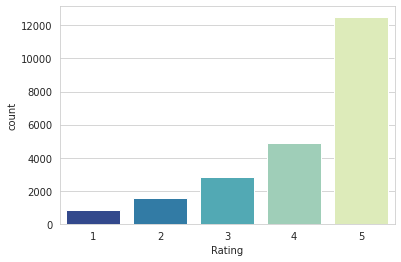

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Rating',data=df, palette='YlGnBu_r')

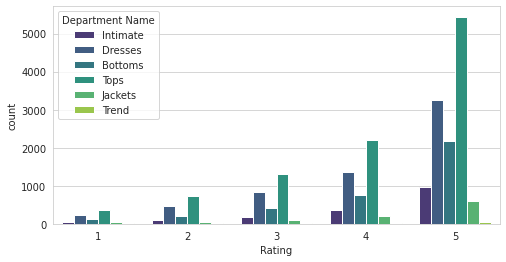

In [10]:
plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
sns.countplot(x='Rating',hue='Department Name',data=df,palette='viridis')

#Working on Imbalanced Data

In [11]:
df_class_Positive = df[df['Rating_Polarity'] == 'Positive'][0:8000]
df_class_Neutral = df[df['Rating_Polarity'] == 'Neutral']
df_class_Negative = df[df['Rating_Polarity'] == 'Negative']

Random over-sampling:
Positive    8000
Neutral     8000
Negative    8000
Name: Rating_Polarity, dtype: int64


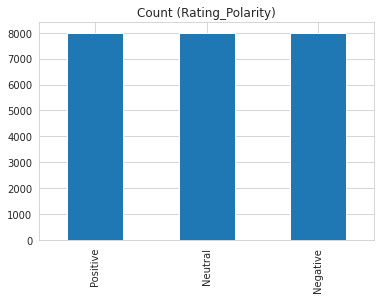

In [12]:
df_class_Neutral_over = df_class_Neutral.sample(8000, replace=True)
df_class_Negative_over = df_class_Negative.sample(8000, replace=True)
df = pd.concat([df_class_Positive, df_class_Neutral_over, df_class_Negative_over], axis=0)

print('Random over-sampling:')
print(df['Rating_Polarity'].value_counts())

df['Rating_Polarity'].value_counts().plot(kind='bar', title='Count (Rating_Polarity)');

In [13]:
df.shape

(24000, 9)

#Text Preprocessing 

In [14]:
import re
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
def text_processing(text):
    
    Stopwords = stopwords.words('english')
    # Check characters to see if they are in punctuation
    no_punctuation = [char for char in text if char not in string.punctuation]

    # Join the characters again to form the string.
    no_punctuation = ''.join(no_punctuation)
    
    # Now just remove any stopwords
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in Stopwords])

In [16]:
df['review'] = df['Review Text'].apply(text_processing)
df.head()

,Clothing ID,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name,Rating_Polarity,review
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,Initmates,Intimate,Intimates,Positive,Absolutely wonderful silky sexy comfortable
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,General,Dresses,Dresses,Positive,Love dress sooo pretty happened find store im ...
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite,Bottoms,Pants,Positive,love love love jumpsuit fun flirty fabulous ev...
4,847,47,This shirt is very flattering to all due to th...,5,1,General,Tops,Blouses,Positive,shirt flattering due adjustable front tie perf...
6,858,39,I aded this in my basket at hte last mintue to...,5,1,General Petite,Tops,Knits,Positive,aded basket hte last mintue see would look lik...


In [17]:
df=df[['review', 'Rating_Polarity']]
df.head()

,review,Rating_Polarity
0,Absolutely wonderful silky sexy comfortable,Positive
1,Love dress sooo pretty happened find store im ...,Positive
3,love love love jumpsuit fun flirty fabulous ev...,Positive
4,shirt flattering due adjustable front tie perf...,Positive
6,aded basket hte last mintue see would look lik...,Positive


# One Hot Encoding

In [18]:
one_hot = pd.get_dummies(df["Rating_Polarity"])
df.drop(['Rating_Polarity'],axis=1,inplace=True)
df = pd.concat([df,one_hot],axis=1)
df.head()

,review,Negative,Neutral,Positive
0,Absolutely wonderful silky sexy comfortable,0,0,1
1,Love dress sooo pretty happened find store im ...,0,0,1
3,love love love jumpsuit fun flirty fabulous ev...,0,0,1
4,shirt flattering due adjustable front tie perf...,0,0,1
6,aded basket hte last mintue see would look lik...,0,0,1


#Splitting into Test and Train

In [19]:
from sklearn.model_selection import train_test_split
X=df['review'].values
y=df.drop('review', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#Feature Extraction

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#Vectorization
bow = CountVectorizer()
X_train = bow.fit_transform(X_train)
X_test = bow.transform(X_test)

In [21]:
#Term Frequency, Inverse Document Frequency
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
X_train=X_train.toarray()
X_test=X_test.toarray()

#Building the Model

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [23]:
model = Sequential()

model.add(Dense(units=12673,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=4000,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=500,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=3, activation='softmax'))

opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [24]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [25]:
model.fit(x=X_train, y=y_train, batch_size=512, epochs=10, validation_data=(X_test, y_test), verbose=1, callbacks=early_stop)

Epoch 1/10
33/33 [==============================] - 14s 320ms/step - loss: 0.6953 - accuracy: 0.6814 - val_loss: 0.3857 - val_accuracy: 0.8583
Epoch 2/10
33/33 [==============================] - 10s 299ms/step - loss: 0.1453 - accuracy: 0.9511 - val_loss: 0.2613 - val_accuracy: 0.9168
Epoch 3/10
33/33 [==============================] - 10s 300ms/step - loss: 0.0234 - accuracy: 0.9941 - val_loss: 0.3616 - val_accuracy: 0.9081
Epoch 4/10
33/33 [==============================] - 10s 303ms/step - loss: 0.0056 - accuracy: 0.9987 - val_loss: 0.3426 - val_accuracy: 0.9260
Epoch 00004: early stopping


#Evaluating the Model

In [26]:
df_m=pd.DataFrame(model.history.history)
df_m['Epoch']=range(1,5)
df_m.index=df_m['Epoch']
df_m

,loss,accuracy,val_loss,val_accuracy,Epoch
Epoch,,,,,
1,0.695273,0.681369,0.385665,0.858333,1
2,0.145288,0.951131,0.261267,0.916806,2
3,0.023376,0.994107,0.361605,0.908056,3
4,0.005593,0.998690,0.342650,0.925972,4


In [27]:
score = model.evaluate(X_test, y_test, batch_size=64, verbose=1)
print('Test accuracy:', score[1])

113/113 [==============================] - 3s 24ms/step - loss: 0.3426 - accuracy: 0.9260
Test accuracy: 0.9259722232818604


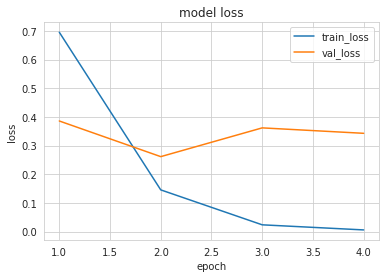

In [28]:
#Loss Graph(Training and Validation)
plt.plot(df_m['loss'])
plt.plot(df_m['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

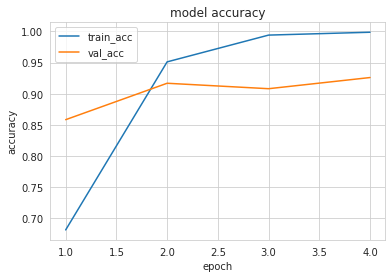

In [29]:
# Accuracy Graph(Training and Validation) 
plt.plot(df_m['accuracy'])
plt.plot(df_m['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'])
plt.show()

In [30]:
preds = model.predict(X_test)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(np.argmax(y_test,axis=1),np.argmax(preds,axis=1)))
print(classification_report(np.argmax(y_test,axis=1),np.argmax(preds,axis=1)))

[[2310   68   58]
 [  61 2196  148]
 [  59  139 2161]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2436
           1       0.91      0.91      0.91      2405
           2       0.91      0.92      0.91      2359

    accuracy                           0.93      7200
   macro avg       0.93      0.93      0.93      7200
weighted avg       0.93      0.93      0.93      7200

